#Librerias

In [1]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 4.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.1 MB/s 
     |████████████████████████████████| 9.8 MB 33.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
plt.style.use('fivethirtyeight') 
import seaborn as sns
import pandas as pd



%matplotlib inline
from pylab import rcParams
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_predict

from fbprophet import Prophet
import math
from math import sqrt
from sklearn.metrics import mean_squared_error
from random import random
import datetime
import scipy
from scipy import stats

#ARIMA NETO
Menos historial
Más historial

https://www.projectpro.io/article/how-to-build-arima-model-in-python/544

https://www.javatpoint.com/arima-model-in-python#:~:text=ARIMA%2C%20abbreviated%20for%20'Auto%20Regressive,order%20to%20forecast%20future%20values

In [37]:
url='https://raw.githubusercontent.com/Javimitri/data/main/RU_VIERNES_4.csv'
#df = pd.read_csv(url,index_col='fecha',parse_dates=True)

df2 = pd.read_csv(url) #sin agrupar
#df2=df.groupby("fecha").neto.sum() #agrupar todas las pesadas por fecha

#prueba con menos historial
data=df2.iloc[0:300]
df_menos=data['neto']
#data2["fecha"] = pd.to_datetime(data2["fecha"])

#prueba con mas historial
df_mas = df2['neto']

#MENOS HISTORIAL
Los 300 primeros datos

##plots

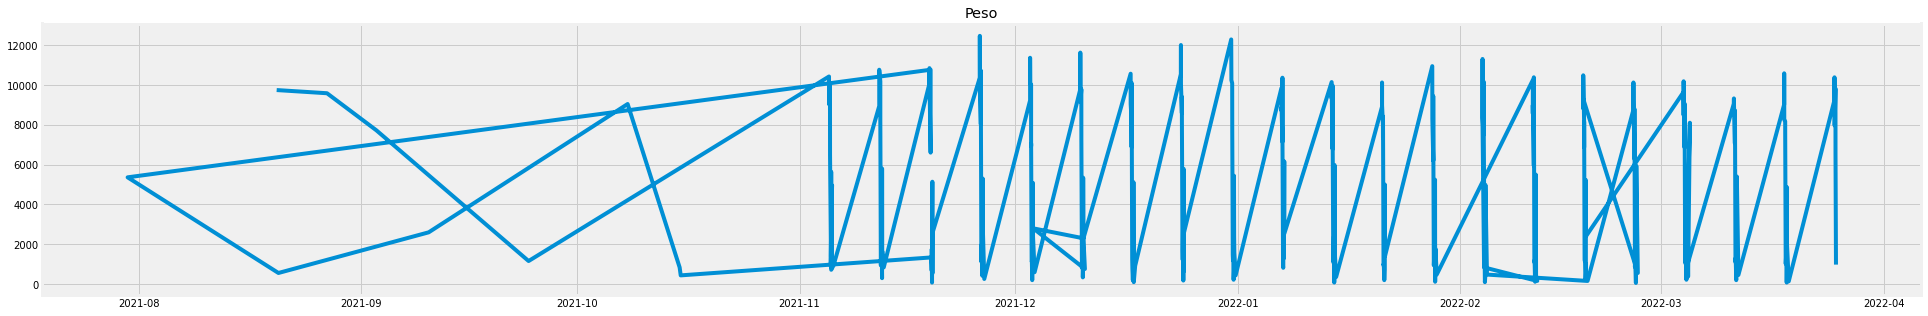

In [29]:
#Visualizacion
plt.figure(figsize=(30, 5))
plt.plot(df_menos)
plt.title('Peso')
plt.grid(True)
plt.show();

In [ ]:
def running_average(x, order):
    current = x[:order].sum()
    running = []
    
    for i in range(order, x.shape[0]):
        current += x[i]
        current -= x[i-order]
        running.append(current/order)
    
    return np.array(running)

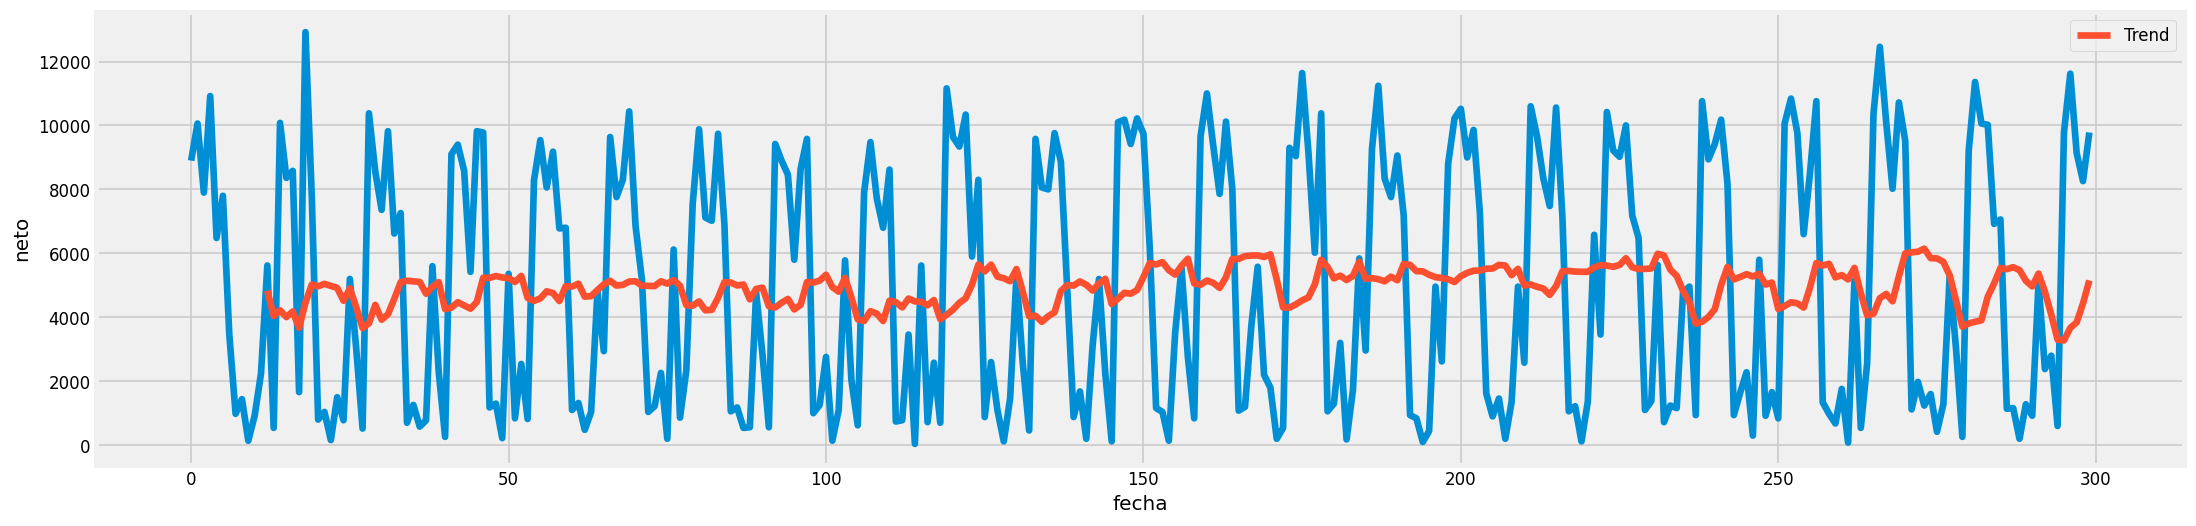

In [ ]:
trend = running_average(df_menos, 12)

fig, ax = plt.subplots(1, 1,figsize=(20,5))
ax.plot(data.index, df_menos)
ax.set_xlabel('fecha')
ax.set_ylabel('neto')
ax.plot(data.index[12:], trend, label='Trend')
ax.legend()

In [ ]:
#Seasonal Decompose Plots
from statsmodels.tsa.seasonal import seasonal_decompose
a = seasonal_decompose(df_menos, freq=7)
a.plot();

TypeError: ignored

In [ ]:
plt.figure(figsize = (16,7))
a.seasonal.plot();

NameError: ignored

<Figure size 1152x504 with 0 Axes>

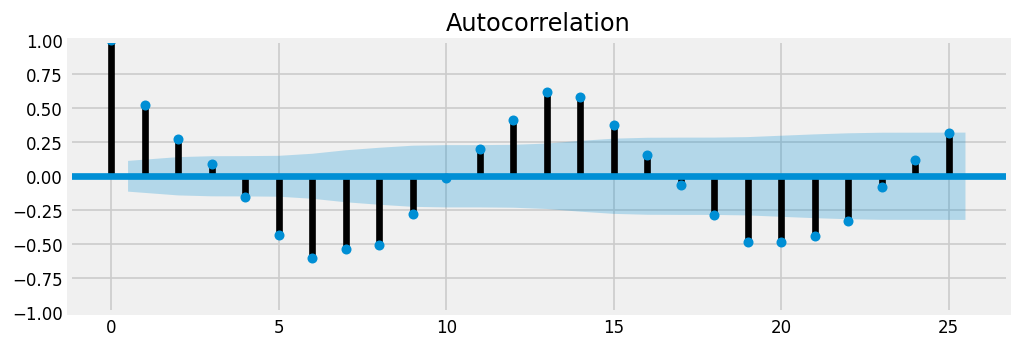

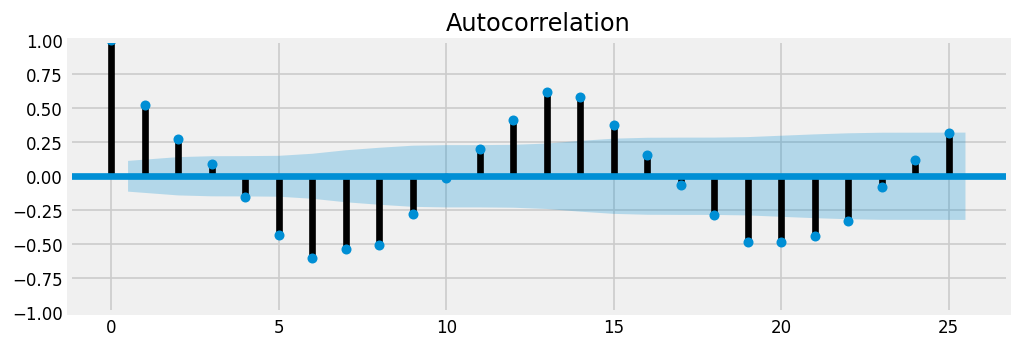

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_menos)

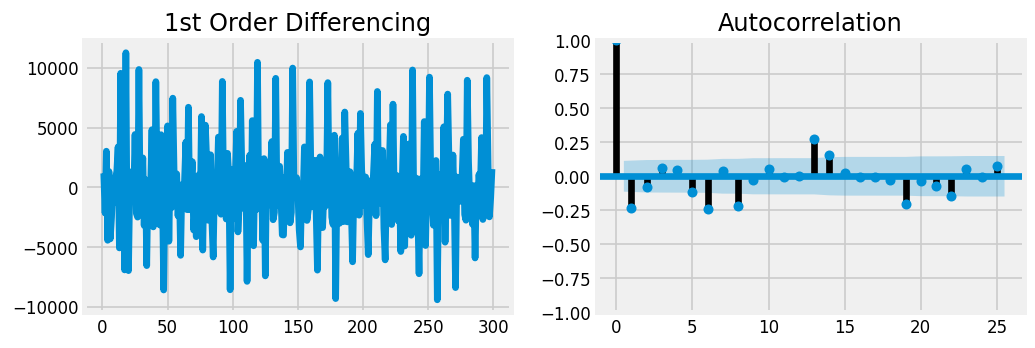

In [ ]:
f=plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df_menos.diff())

ax2=f.add_subplot(122)
plot_acf(df_menos.diff().dropna(),ax=ax2)
plt.show()

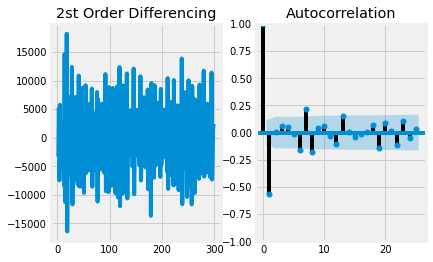

In [ ]:
f=plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('2st Order Differencing')
ax1.plot(df_menos.diff().diff())

ax2=f.add_subplot(122)
plot_acf(df_menos.diff().diff().dropna(),ax=ax2)
plt.show()

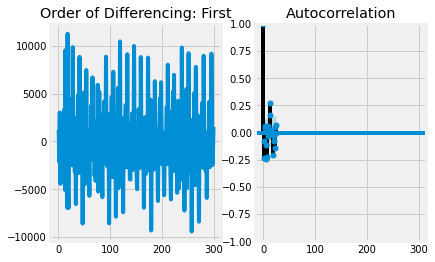

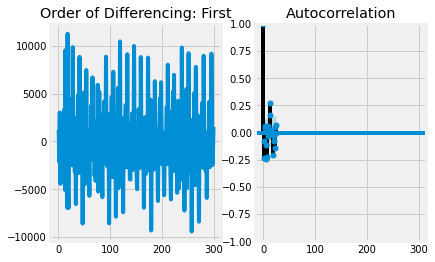

In [ ]:
fig, axes = plt.subplots(1, 2, sharex = True)  
axes[0].plot(df_menos.diff()); axes[0].set_title('Order of Differencing: First')  
axes[1].set(ylim = (0, 1.2))  
plot_acf(df_menos.diff().dropna(), ax = axes[1])  

##estadísticas

In [ ]:
result=adfuller(df_menos.dropna())

print("ADF :",result[0])
print("p-value :",result[1])
print("num of lags :",result[2])
print("num of observations used for ADR Regression and Critical Values Calculation :",result[3])
print("critical values: ")
for key, val in result[4].items():
  print("\t",key,": ", val)

ADF : -4.4725449781588775
p-value : 0.00022036449120806543
num of lags : 14
num of observations used for ADR Regression and Critical Values Calculation : 285
critical values: 
	 1% :  -3.4535050041524245
	 5% :  -2.8717352599720294
	 10% :  -2.5722024776854417


##selección del modelo 1
Se calcula un p-valor del modelo de 1.7636e-15. El orden de diferenciación correspondiente con este valor es 0 por lo que se toma que el valor d el orden de diff.\
El siguiente valor que se tiene que calcular es el p, correspondiente al modelo autorregresivo. Se observa que la gráfica de autocorrelación de primer y de segundo orden el primer retraso es el que se muestra más significativo.\
Por último, el valor q se estima a través de la gráfica ACF. Mediante la cantidad de retrasos que cruzan el umbral. Con esta observación, se determinan cuantos datos del pasado se pueden considerar significativos para el modelo.


In [ ]:
train = df_menos[0:int(len(df_menos)*0.9)]
test = df_menos[int(len(df_menos)*0.9):]

In [ ]:
arima_model=ARIMA(train,order=(1,0,2))
model_fit=arima_model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   neto   No. Observations:                  270
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -2568.880
Date:                Sat, 09 Jul 2022   AIC                           5147.761
Time:                        22:38:05   BIC                           5165.753
Sample:                             0   HQIC                          5154.986
                                - 270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5043.1852    384.878     13.103      0.000    4288.839    5797.532
ar.L1          0.4897      0.181      2.704      0.007       0.135       0.845
ma.L1          0.0122      0.189      0.065      0.9

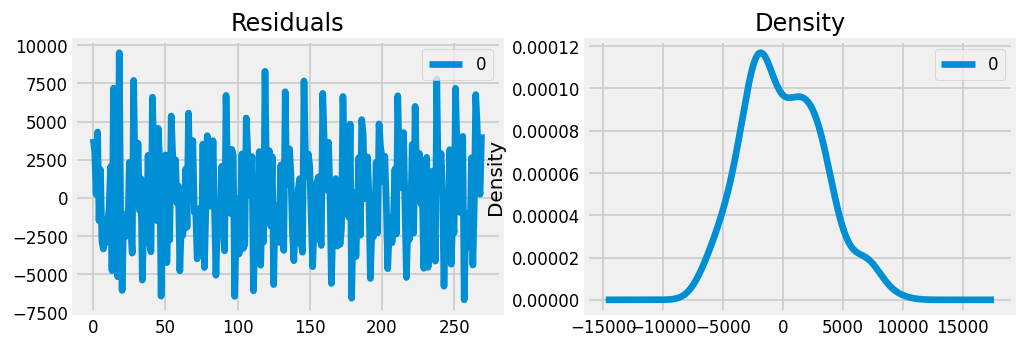

In [ ]:
plt.rcParams.update({'figure.figsize' : (9,3), 'figure.dpi' : 120}) 
  
# Plotting Residual Errors  
myresiduals = pd.DataFrame(model_fit.resid)  
fig, ax = plt.subplots(1,2)  
myresiduals.plot(title = "Residuals", ax = ax[0])  
myresiduals.plot(kind = 'kde', title = 'Density', ax = ax[1])  
plt.show()  

In [ ]:
plt.rcParams.update({'figure.figsize' : (9,3), 'figure.dpi' : 120})  
  
# Actual vs Fitted  
model_fit.plot_predict(dynamic = False)  
plt.show()  

AttributeError: ignored

##selección del modelo 2

In [ ]:
stepwise_fit_menos=auto_arima(df_menos, trace=True, suppress_warnings=True)
stepwise_fit_menos.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=5716.787, Time=0.91 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5806.863, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5711.240, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5734.845, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6104.159, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=5713.238, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5713.237, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5715.237, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5764.351, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.981 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  300
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -2852.620
Date:                Sat, 09 Jul 2022   AIC                           5711.240
Time:                        16:31:28   BIC                           5722.351
Sample:                             0   HQIC                          5715.687
                                - 300                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2364.0154    300.911      7.856      0.000    1774.241    2953.790
ar.L1          0.5307      0.053      9.952      0.000       0.426       0.635
sigma2      1.062e+07      0.068   1.56e+08      0.000    1.06e+07    1.06e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.05
Prob(Q):                              0.98   Prob(JB):                         0.03
Heteroskedasticity (H):               0.96   Skew:                             0.36
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.26e+23. Standard errors may be unstable.
"""

In [ ]:
#Se dividen los datos en train y test
train = df_menos[0:int(len(df_menos)*0.9)]
test = df_menos[int(len(df_menos)*0.9):]

start=len(train)
end=len(train)+len(test)-1

In [ ]:
model_menos = ARIMA(train, order=(4,0,2))
model_fit_menos = model_menos.fit()
pred_menos=model_fit_menos.predict(start = start, end = end)

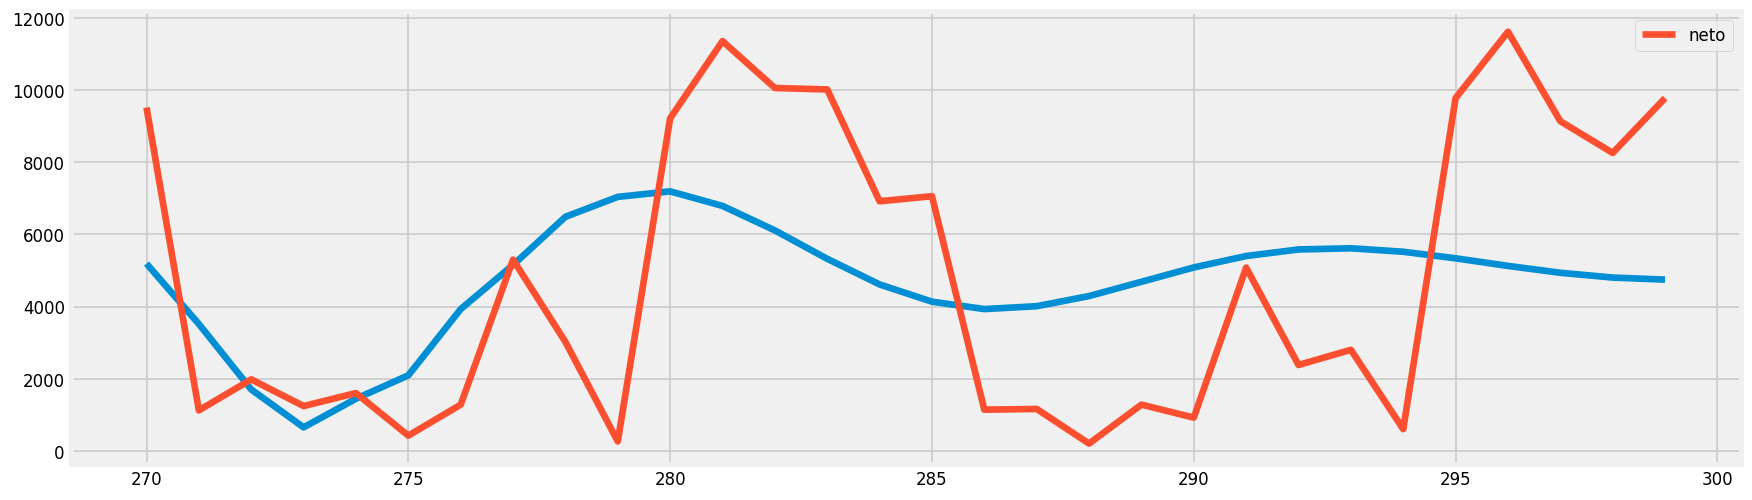

In [ ]:
plt.plot(pred_menos)
test.plot(figsize = (16,5), legend=True)
#pred index=df index[start endell

#MAS HISTORIAL
Todos los datos

##plots

In [38]:
df_mas

0       8900.0
1      10060.0
2       7900.0
3      10920.0
4       6480.0
        ...   
621     1320.0
622      180.0
623     1080.0
624     6520.0
625     2240.0
Name: neto, Length: 626, dtype: float64

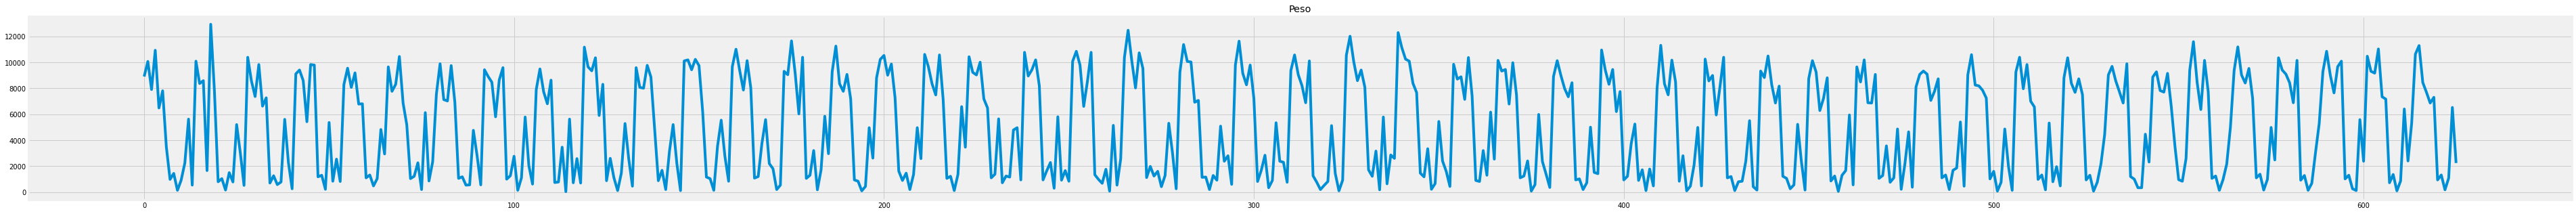

In [39]:
#Visualizacion
plt.figure(figsize=(60, 5))
plt.plot(df_mas)
plt.title('Peso')
plt.grid(True)
plt.show();

In [ ]:
def running_average(x, order):
    current = x[:order].sum()
    running = []
    
    for i in range(order, x.shape[0]):
        current += x[i]
        current -= x[i-order]
        running.append(current/order)
    
    return np.array(running)

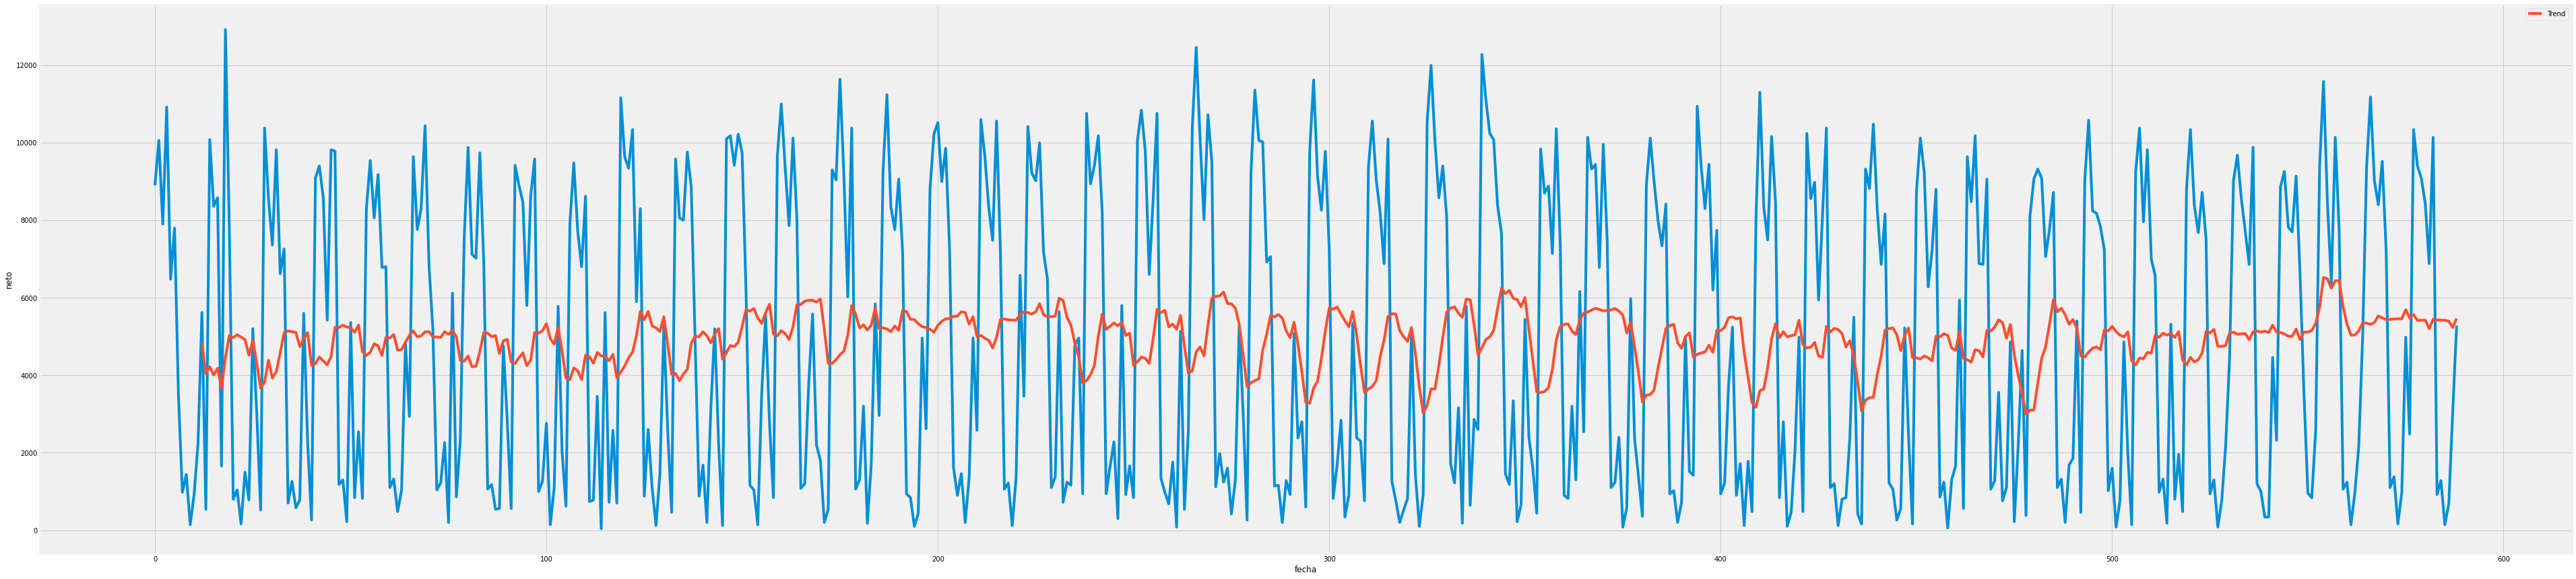

In [ ]:
trend = running_average(df_mas, 12)

fig, ax = plt.subplots(1, 1,figsize=(60,15))
ax.plot(df_mas.index, df_mas)
ax.set_xlabel('fecha')
ax.set_ylabel('neto')
ax.plot(df_mas.index[12:], trend, label='Trend')
ax.legend()

https://towardsdatascience.com/time-series-decomposition-and-statsmodels-parameters-69e54d035453

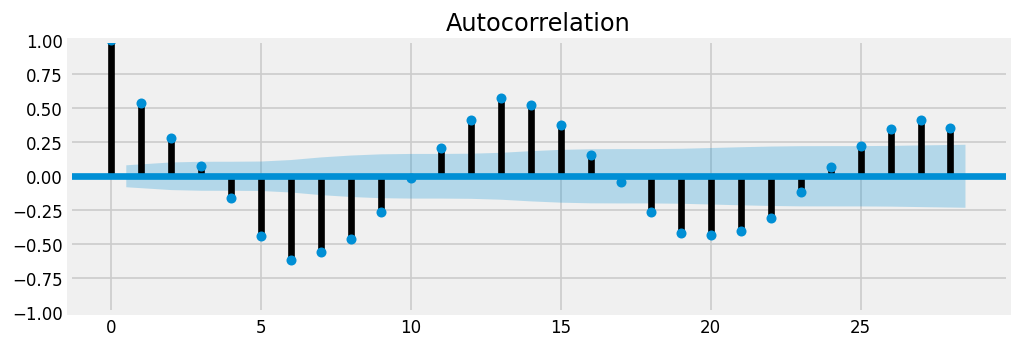

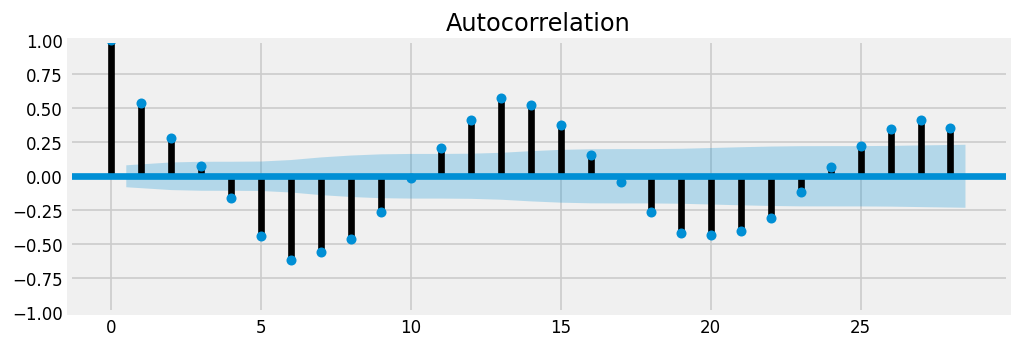

In [ ]:
plot_acf(df_mas)

https://support.minitab.com/es-mx/minitab/18/help-and-how-to/modeling-statistics/time-series/how-to/partial-autocorrelation/interpret-the-results/partial-autocorrelation-function-pacf/

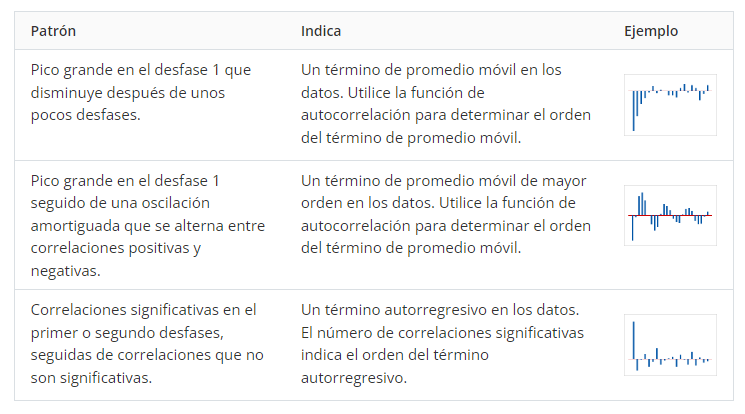

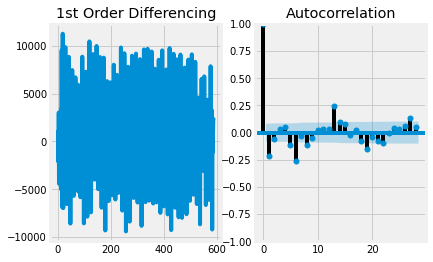

In [ ]:
f=plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df_mas.diff())

ax2=f.add_subplot(122)
plot_acf(df_mas.diff().dropna(),ax=ax2)
plt.show()

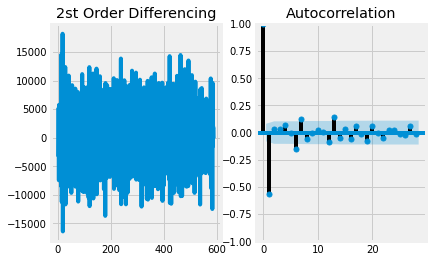

In [ ]:
f=plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('2st Order Differencing')
ax1.plot(df_mas.diff().diff())

ax2=f.add_subplot(122)
plot_acf(df_mas.diff().diff().dropna(),ax=ax2)
plt.show()

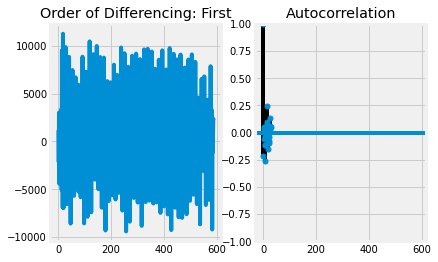

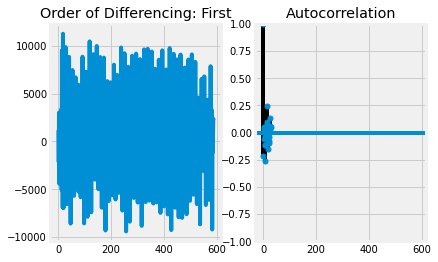

In [ ]:
fig, axes = plt.subplots(1, 2, sharex = True)  
axes[0].plot(df_mas.diff()); axes[0].set_title('Order of Differencing: First')  
axes[1].set(ylim = (0, 1.2))  
plot_acf(df_mas.diff().dropna(), ax = axes[1])  

##estadística
prueba ADF (Dickey-Fuller aumentada) 

In [40]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df_mas.dropna())

print("ADF :",result[0])
print("p-valor :",result[1])
print("num de lags :",result[2])
print("num de observaciones usadas para la regresión de ADR y los cálculos de los valores críticos :",result[3])
print("valores criticos: ")
for key, val in result[4].items():
  print("\t",key,": ", val)

ADF : -4.9950960423670265
p-valor : 2.2694498812578156e-05
num de lags : 19
num de observaciones usadas para la regresión de ADR y los cálculos de los valores críticos : 606
valores criticos: 
	 1% :  -3.4411869900487906
	 5% :  -2.866321181236609
	 10% :  -2.569316262893616


Se calcula un p-valor del modelo de 1.7636e-15. El orden de diferenciación correspondiente con este valor es 0 por lo que se toma que el valor d el orden de diff. \
d=0

##selección del modelo 1
El siguiente valor que se tiene que calcular es el p, correspondiente al modelo autorregresivo. Se observa que la gráfica de autocorrelación de primer y de segundo orden el primer retraso es el que se muestra más significativo.\
Por último, el valor q se estima a través de la gráfica ACF. Mediante la cantidad de retrasos que cruzan el umbral. Con esta observación, se determinan cuantos datos del pasado se pueden considerar significativos para el modelo.


In [43]:
train_data = df_mas[0:int(len(df_mas)*0.9)]
test_data = df_mas[int(len(df_mas)*0.9):]

start=len(train_data)-100
end=len(train_data)+len(test_data)+50

In [41]:
stepwise_fit_mas=auto_arima(df_mas, trace=True, suppress_warnings=True)
stepwise_fit_mas.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=11896.374, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=12109.258, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=11891.593, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=11942.783, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12726.973, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=11893.499, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=11893.527, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=11895.629, Time=0.45 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=11997.140, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.709 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  626
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -5942.796
Date:                Tue, 12 Jul 2022   AIC                          11891.593
Time:                        12:27:28   BIC                          11904.911
Sample:                             0   HQIC                         11896.768
                                - 626                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2259.9400    208.778     10.825      0.000    1850.742    2669.138
ar.L1          0.5454      0.036     15.013      0.000       0.474       0.617
sigma2       1.03e+07      0.049   2.11e+08      0.000    1.03e+07    1.03e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 9.49
Prob(Q):                              0.89   Prob(JB):                         0.01
Heteroskedasticity (H):               0.93   Skew:                             0.29
Prob(H) (two-sided):                  0.60   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.17e+22. Standard errors may be unstable.
"""

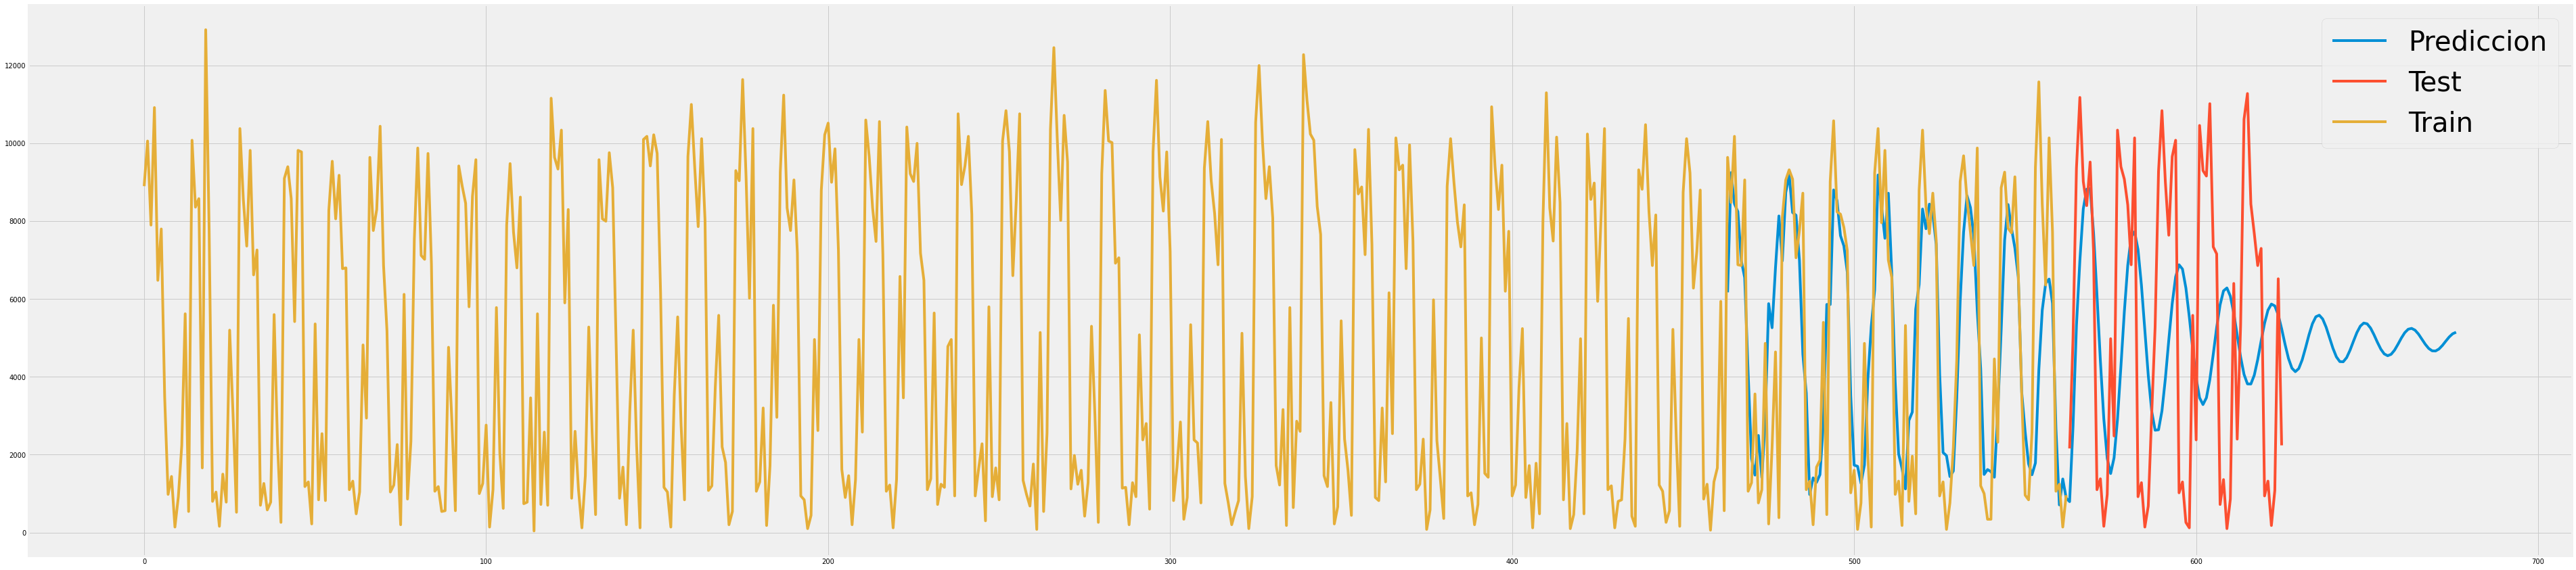

In [44]:
arima_model_mayor=ARIMA(train_data,order=(6,0,2)) #402
model_fit_mayor=arima_model_mayor.fit()
model_predict_mayor=model_fit_mayor.predict(start=start, end=end)

fig, ax = plt.subplots(1, 1,figsize=(60,15))
plt.plot(model_predict_mayor, label='Prediccion')
plt.plot(test_data, label='Test')
plt.plot(train_data, label='Train')
plt.legend(prop={'size': 40})

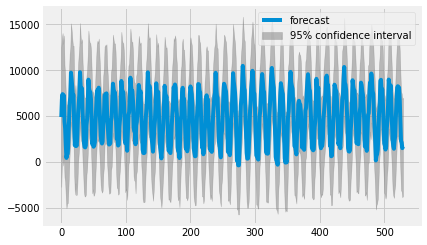

In [ ]:
plot_predict(model_fit_mayor,dynamic=False)
plt.show()

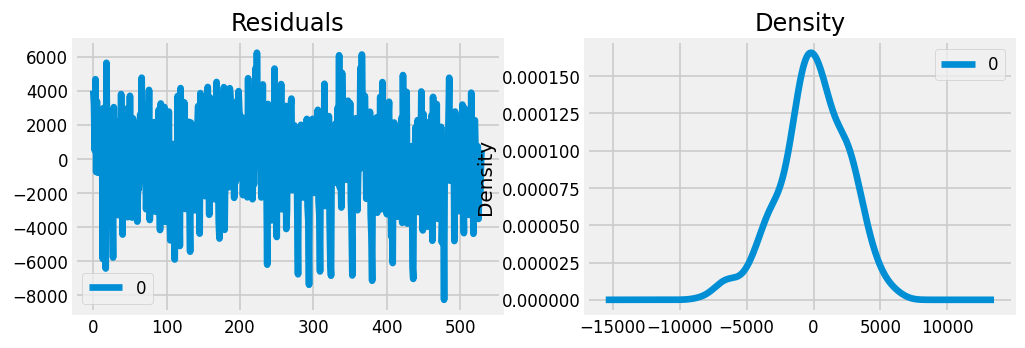

In [ ]:
plt.rcParams.update({'figure.figsize' : (9,3), 'figure.dpi' : 120})   
  
# Plotting Residual Errors  
myresiduals = pd.DataFrame(model_fit_mayor.resid)  
fig, ax = plt.subplots(1,2)  
myresiduals.plot(title = "Residuals", ax = ax[0])  
myresiduals.plot(kind = 'kde', title = 'Density', ax = ax[1])  
plt.show()  

In [ ]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(model_fit_mayor.resid, return_df=True)

,lb_stat,lb_pvalue
1,0.002564,0.959616
2,0.120569,0.941497
3,0.318329,0.956545
4,0.318484,0.988590
5,0.844557,0.974105
6,1.947040,0.924504
7,6.952777,0.433813
8,6.992962,0.537392
9,7.060867,0.630782
10,7.627952,0.665126


In [ ]:
myresiduals.mean()

0    8.376576
dtype: float64

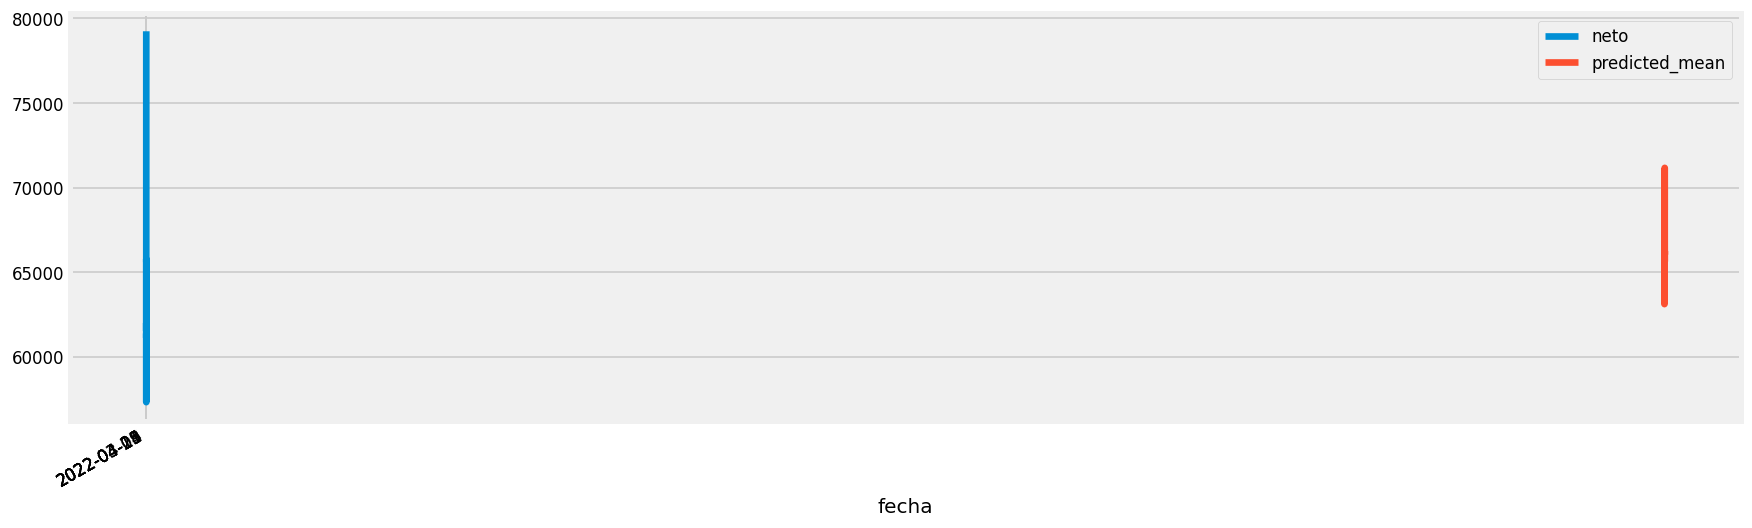

In [ ]:
test_data.plot(figsize = (16,5), legend=True)
model_predict_mayor.plot(legend = True);

##seleccion del modelo 2

In [ ]:
train_data = df_mas[0:int(len(df_mas)*0.9)]
test_data = df_mas[int(len(df_mas)*0.9):]

model = ARIMA(train_data, order=(4,0,2))
model_fit = model.fit()

arima_pred = model_fit.predict(start = len(train_data), end = len(df_mas)-1)

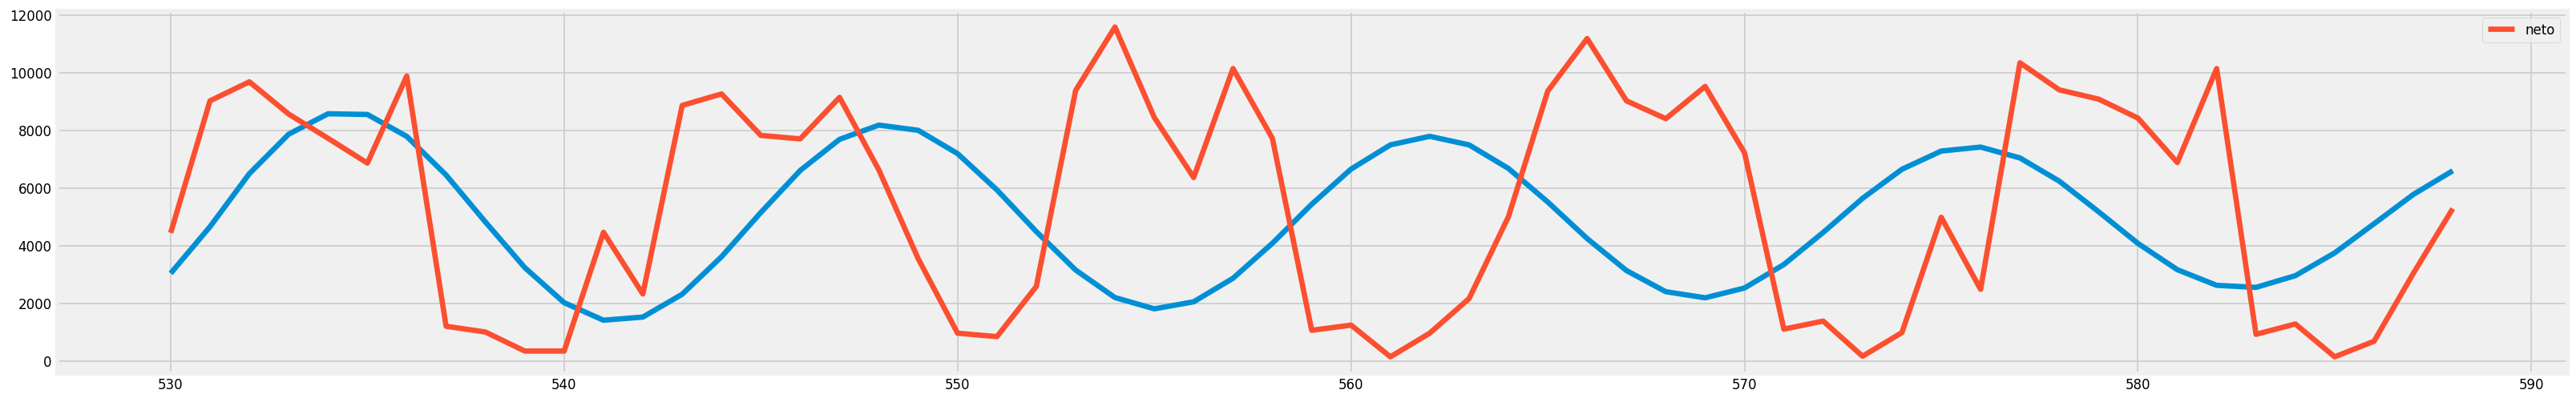

In [ ]:
#df.plot(figsize = (16,5), legend=True)
plt.figure(figsize=(30, 5))
plt.plot(arima_pred)
test.plot(legend = True)

##3

In [ ]:
train = df_mas[0:int(len(df_mas)*0.9)]
test = df_mas[int(len(df_mas)*0.9):]

history = [x for x in train]
predictions = list()
model = ARIMA(train, order=(4,0,2))
model_fit = model.fit()
for t in range(len(test)):
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show();

KeyError: ignored

https://www.youtube.com/watch?v=8FCDpFhd1zk&t=3s

##selección del modelo 4 AUTOARIMA

In [ ]:
stepwise_fit_mas=auto_arima(df_mas, trace=True, suppress_warnings=True)
stepwise_fit_mas.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=11194.536, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=11391.278, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=11189.825, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=11236.531, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11969.101, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=11191.710, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=11191.739, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=11193.831, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=11290.190, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.437 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  589
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -5591.912
Date:                Sat, 09 Jul 2022   AIC                          11189.825
Time:                        20:18:27   BIC                          11202.960
Sample:                             0   HQIC                         11194.942
                                - 589                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2266.2174    213.452     10.617      0.000    1847.860    2684.575
ar.L1          0.5417      0.037     14.460      0.000       0.468       0.615
sigma2      1.032e+07      0.050   2.05e+08      0.000    1.03e+07    1.03e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                10.13
Prob(Q):                              0.88   Prob(JB):                         0.01
Heteroskedasticity (H):               0.92   Skew:                             0.31
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.17e+23. Standard errors may be unstable.
"""

In [ ]:
#Se dividen los datos en train y test
train = df_mas[0:int(len(df_mas)*0.9)]
test = df_mas[int(len(df_mas)*0.9):]

start=len(train)
end=len(train)+len(test)-1

In [ ]:
model = ARIMA(train, order=(1,0,0))#4 0 2
model_fit = model.fit()
pred_mas=model_fit.predict(start = start, end = end)
pred_mas.index=df_mas.index[start:end+1]

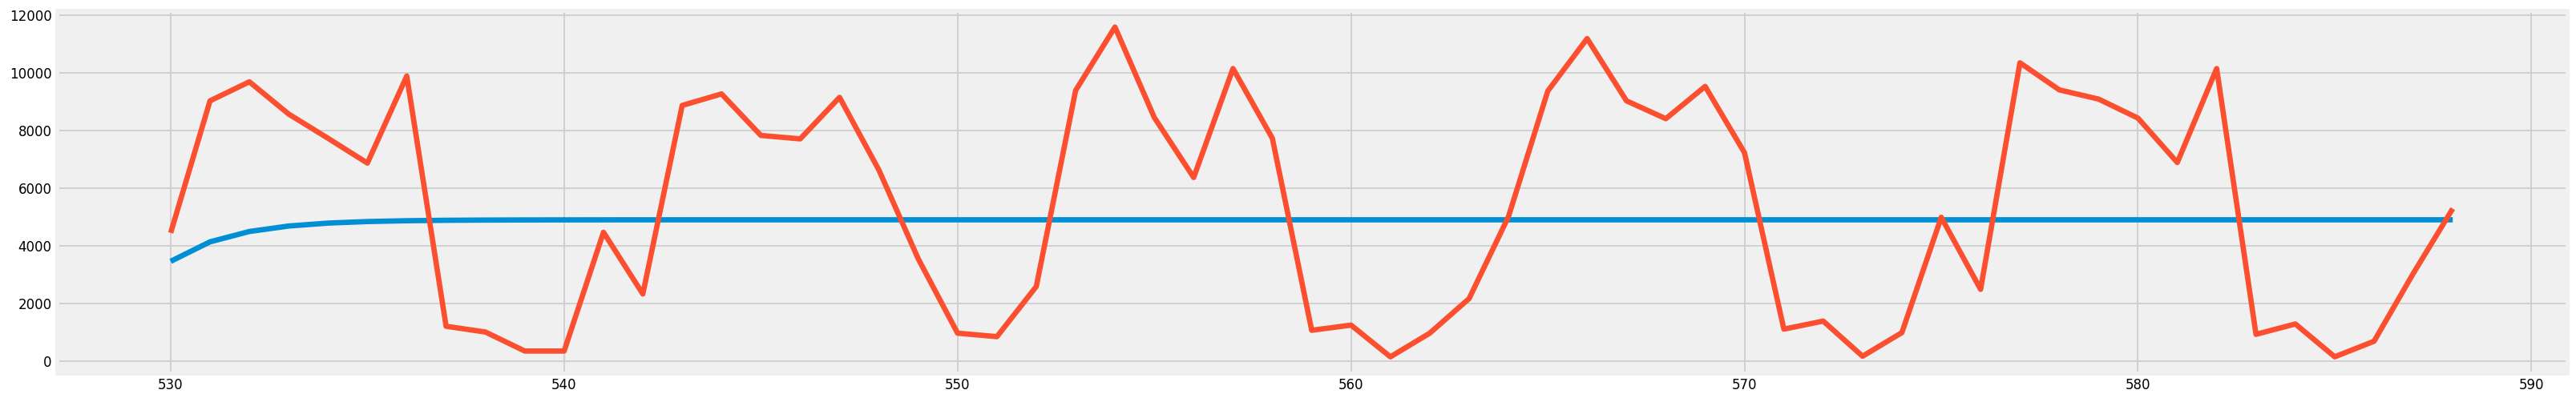

In [ ]:
plt.figure(figsize=(30, 5))
plt.plot(pred_mas)
plt.plot(test)

#df_mas.plot(figsize = (16,5), legend=True)

In [ ]:
test.mean()

5401.6949152542375

In [ ]:
rmse=sqrt(mean_squared_error(pred_mas,test))
print(rmse)

3799.678789180984


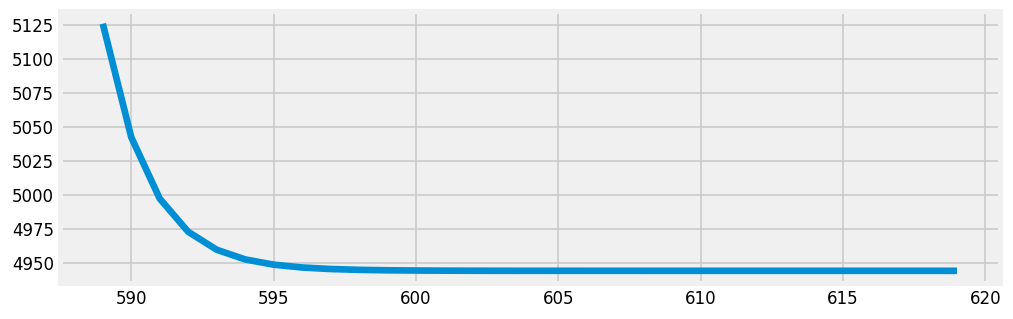

In [ ]:
pred=model2.predict(start=len(df_mas),end=len(df_mas)+30,type='levels').rename('ARIMA Predictions')
pred.plot()

##5

In [ ]:
#Se dividen los datos en train y test
train = df_mas[0:int(len(df_mas)*0.9)]
test = df_mas[int(len(df_mas)*0.9):]

start=len(train)
end=len(train)+len(test)-1

predicted=3475.375252, expected=4440.000000
predicted=4686.501709, expected=9020.000000
predicted=7119.643983, expected=9680.000000
predicted=7547.452209, expected=8560.000000
predicted=6849.635682, expected=7720.000000
predicted=6361.171256, expected=6860.000000
predicted=5925.830051, expected=9880.000000
predicted=7524.377645, expected=1200.000000
predicted=3090.012388, expected=1000.000000
predicted=2607.503205, expected=340.000000
predicted=2501.321763, expected=340.000000
predicted=2483.641069, expected=4460.000000
predicted=4659.589972, expected=2320.000000
predicted=3667.031535, expected=8860.000000
predicted=6884.253006, expected=9260.000000
predicted=7402.248702, expected=7820.000000
predicted=6463.884469, expected=7700.000000
predicted=6335.023389, expected=9140.000000
predicted=7152.134380, expected=6620.000000
predicted=5886.175946, expected=3540.000000
predicted=4128.162372, expected=960.000000
predicted=2740.353357, expected=840.000000
predicted=2687.474325, expected=2580

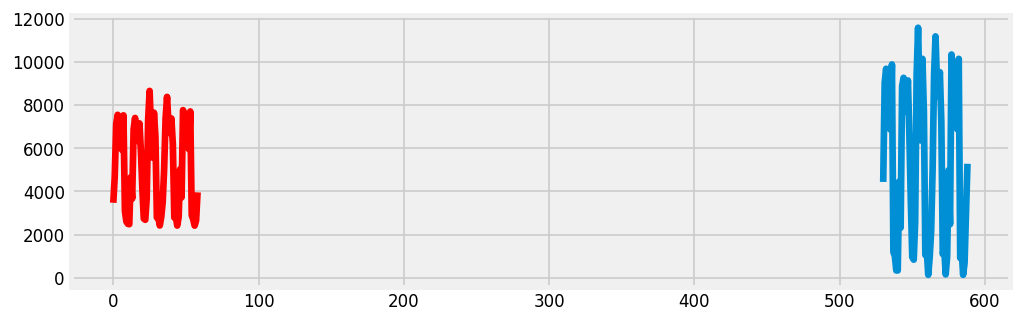

In [ ]:
history = [x for x in train]
predictions = list()

for t in range(len(test)):
  model = ARIMA(history, order=(1,0,2))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test.iloc[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show();

##6

#ARIMA COMBUSTIBLE

#PROPHET